In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
#Load dataset
dt = load_breast_cancer()
X = dt.data
y = dt.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape

(398, 30)

In [ ]:
# print the names of the 13 features
print("Features: ", dt.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", dt.target_names)


Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [ ]:
# print data(feature)shape
dt.data.shape


(569, 30)

In [ ]:
# print the cancer data features (top 5 records)
print(dt.data[0:5])
# print the cancer labels (0:malignant, 1:benign)
print(dt.target[0:5])


[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_test)

# Calculate the accuracy of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of the SVM classifier:", accuracy_svm)

# Calculate the probabilities for each class for the test set using SVM
y_probs_svm= clf.predict_proba(X_test)

# Compute ROC curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_probs_svm[:, 1])
auc_svm = auc(fpr_svm, tpr_svm)

Accuracy of the SVM classifier: 0.9766081871345029


In [ ]:
# Instantiate the KNN classifier with a specified number of neighbors (e.g., 3)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Predict the labels for the test set using KNN
y_pred_knn = knn.predict(X_test)

# Calculate the accuracy of the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of the KNN classifier:", accuracy_knn)

# Calculate the probabilities for each class for the test set using KNN
y_probs_knn = knn.predict_proba(X_test)

# Compute ROC curve and AUC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn[:, 1])
auc_knn = auc(fpr_knn, tpr_knn)


Accuracy of the KNN classifier: 0.9590643274853801


In [ ]:
# Decision Tree classifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=20,min_samples_leaf=4,random_state=42)

# Train the Decision Tree classifier
dt.fit(X_train, y_train)

# Predict the labels for the test set using Decision Tree
y_pred_dt = dt.predict(X_test)

# Calculate the accuracy of the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of the Decision Tree classifier:", accuracy_dt)

# Calculate the probabilities for each class for the test set using Decision Tree
y_probs_dt = dt.predict_proba(X_test)

# Compute ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt[:, 1])
auc_dt = auc(fpr_dt, tpr_dt)


Accuracy of the Decision Tree classifier: 0.9649122807017544


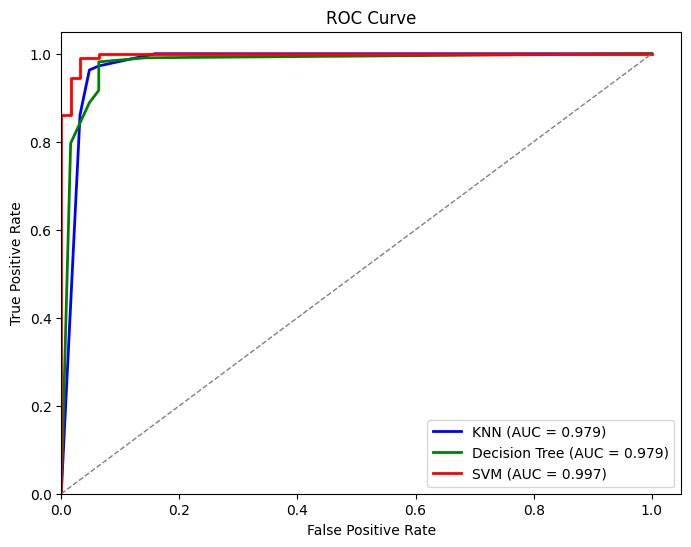

In [ ]:
# Plot ROC curves for KNN and Decision Tree on the same graph
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (AUC = %0.3f)' % auc_knn)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (AUC = %0.3f)' % auc_dt)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (AUC = %0.3f)'% auc_svm)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()